# Project:  Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I conducted my own analysis on TMDB movi data and create a report to share that document the process and findings. I defined questions and then used pandas and NumPy to answer the questions I am most interested in, and created a report sharing the conclusions. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Access Data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# view dimensions of dataset to have a big picture of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [4]:
# Globally format the scientific notation for 'budget_adj' and 'revenue_adj' for further analysis
pd.set_option('display.float_format', lambda x: '%0.f' % x)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292
2,262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130
4,168259,tt2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801


In [5]:
#Drop some data that are not relevent to the analysis
df.drop(['tagline', 'overview', 'homepage', 'id','imdb_id','budget','revenue','release_date'], axis = 1, inplace = True)
df.head(1)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6,2015,137999939,1392445893


### Data Filter by release date 

In [6]:
# Sort the datasets in ascending order of release date
df=df.sort_values(by=['release_year'],ignore_index=True)

### Drop null and duplicate data

In [7]:
#View missing value count for each column
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Drop rows with any null values in dataset
df.dropna(inplace=True)

In [9]:
# Checks if any of columns have null values
df.isnull().sum().any()

False

In [10]:
# Print number of duplicates in 2008 and 2018 datasets
print(df.duplicated().sum())

1


In [11]:
# Drop duplicates in both datasets
df.drop_duplicates(inplace=True)

In [12]:
# Check number of duplicates again to confirm dedupe - should both be 0
print(df.duplicated().sum())

0


### Fix popularity datatype

In [13]:
# Convert popularity to floats for further analysis
df['popularity'] = df['popularity'].astype(float)

In [14]:
# Check the data types
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Save progress for exploratioin

In [15]:
# save progress for exploratioin
df.to_csv('data_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 Which genres are most popular from year to year?

In [16]:
#Load cleaned datasets
df = pd.read_csv('data_clean.csv') 
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [17]:
# Copy exiting dataframe to make work safely
df_genres = df.copy()
df_genres.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,Action|Drama|History|War,Carlyle Productions,14,6,1960,0,0
1,3,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,1180,8,1960,5949601,235934959
2,2,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,224,7,1960,14745935,36164405
3,1,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,211,7,1960,88475609,442378047
4,1,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,235,8,1960,22118902,184324186


In [18]:
# Column 'genres' contains vertical-line-separated values, I want to split them and create a new row per entry
df_genres=df_genres.assign(genres=df_genres['genres'].str.split('|')).explode('genres')

In [19]:
# To identify what genres is the most popular for each year
# I narrow down columns to 'release_year', 'genres', and 'popularity'
# Then use groupby function to group 'release_year' and'genres', sum up popularity for each genere. 
pop_generes=df_genres.groupby(['release_year', 'genres'], as_index=False)['popularity'].sum()
pop_generes.head(15)

,release_year,genres,popularity
0,1960,Action,5
1,1960,Adventure,4
2,1960,Comedy,3
3,1960,Crime,1
4,1960,Drama,7
5,1960,Family,1
6,1960,Fantasy,1
7,1960,History,2
8,1960,Horror,4
9,1960,Music,0


In [20]:
#I use groupby along with lambda to filter the most popular genre for each year
pop_generes_top=pop_generes[["genres", "release_year", "popularity"]].groupby("release_year", as_index=False).apply(lambda df:df.sort_values("popularity", ascending=False)
.head(1)).droplevel(0).sort_values("release_year", ascending=True).reset_index().drop(columns='index')
pop_generes_top.head(10)

,genres,release_year,popularity
0,Drama,1960,7
1,Drama,1961,7
2,Drama,1962,8
3,Thriller,1963,7
4,Comedy,1964,8
5,Drama,1965,6
6,Drama,1966,5
7,Drama,1967,8
8,Drama,1968,8
9,Drama,1969,6


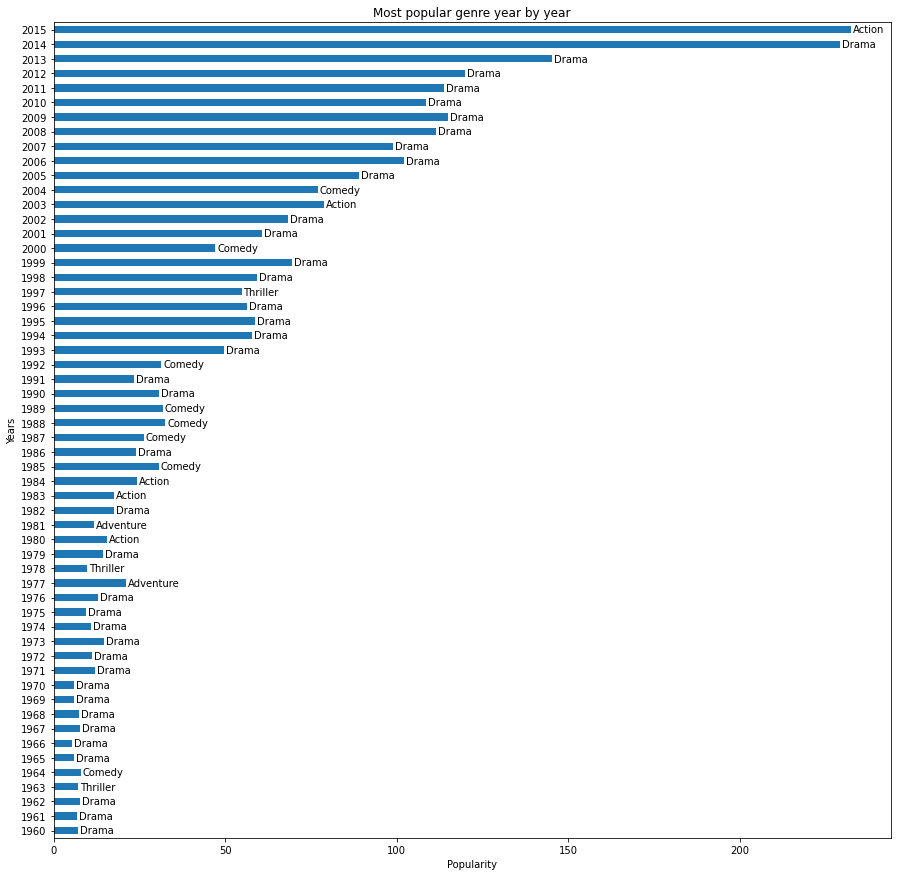

In [21]:
#I consider employing horizontal bar graphy to display previous analyis for better scalability and comparison 

#Define data set for plotting 
y_labels = pop_generes_top.iloc[0:56].release_year
popularity = pop_generes_top.iloc[0:56].popularity
genres = pop_generes_top.iloc[0:56].genres

# Define axis labels and chart title
plt.figure(figsize=(15, 15))
ax = popularity.plot(kind="barh")
ax.set_title("Most popular genre year by year")
ax.set_xlabel("Popularity")
ax.set_ylabel("Years")
ax.set_yticklabels(y_labels)
rects = ax.patches

# Create a python function to add genre lable for its corresponding bar to increase readability. 
for r, g in zip(rects, genres):
    # Get X and Y placement of label from rect.
    x_value = r.get_width()
    y_value = r.get_y() + r.get_height() / 2
    ax.annotate(g,
        (x_value, y_value),
        xytext=(2, 0),  
        textcoords="offset points",
        va='center',
        ha='left'
    )
plt.show()

It seems that drama appears most of time. To further validate my observation, I need to count those genres.

In [22]:
#To count genres and understand their rank, I use value_counts functiont to achieve the goal 
pop_generes_top.genres.value_counts()

Drama        38
Comedy        8
Action        5
Thriller      3
Adventure     2
Name: genres, dtype: int64

### Question 2 What kinds of properties are associated with profitable movies?

In [23]:
#The first step is to define what profitable movie is.
#I googled an article that stated "profitable movies make at least 11% return on investment"
#URL:https://www.washingtonpost.com/news/arts-and-entertainment/wp/2016/05/16/its-hard-to-predict-a-movies-profitability-but-you-learn-some-lessons-along-the-way/
#Define the formulation for my study: profit_movie = df.query('(revenue_adj - budget_adj)/revenue_adj > 0.11')

# For safety, I copied the exiting dataframe
df_profit = df.copy()

In [24]:
#I applied formulation to the dataset and add new column 'profitable' to indicate the profitability
df_profit['profitable'] = np.where((df_profit['revenue_adj']-df_profit['budget_adj'])/df_profit['budget_adj'] > 0.11, True, False)
df_profit.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitable
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,Action|Drama|History|War,Carlyle Productions,14,6,1960,0,0,False
1,3,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,1180,8,1960,5949601,235934959,True
2,2,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,224,7,1960,14745935,36164405,True
3,1,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,211,7,1960,88475609,442378047,True
4,1,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,235,8,1960,22118902,184324186,True


In [25]:
#Define variable for profitable and non-profitable movies
profitable = df_profit.profitable == True
unprofitable = df_profit.profitable == False
#I decided to use histgraph to quickly visualize the distribution of data over year
# Meanwhile, generate comparable the difference between profitable and unprofitable 
#Create function to generate hist graph to reduce code
def create_hist(col,t, x, y):
    col[unprofitable].hist(alpha=0.5,bins=20, label='Unprofitable')
    col[profitable].hist(alpha=0.5,bins=20,label='Profitable')
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);
    plt.show()

### Does the vote associate with the profitability? 

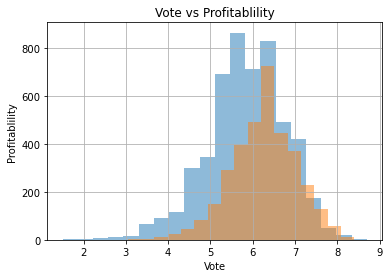

In [28]:
#Use create_hist function to generate hist graph to compare the ditribution of vote 
#for profitable and unprofitable movies
create_hist(df_profit.vote_average,t="Vote vs Profitablility",x="Vote",y="Profitablility")

It looks like when vote is above 6, the distribution of Profitable and unprofitables is almost overlapped. When vote is below 6, the unprofitable movies are far more than profitable ones. It could be said that low-rating movies are more likely to lose money. High-rating are not associated with profitability.

### Does the budget associate with the profitability? 

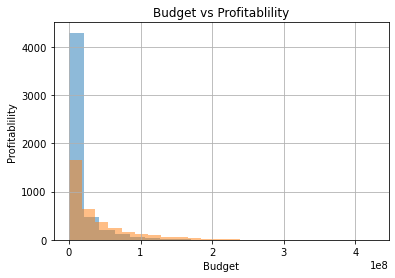

In [29]:
#Use create_hist function to generate hist graph to compare the ditribution of budget 
#for profitable and unprofitable movies
create_hist(df_profit.budget_adj,t="Budget vs Profitablility",x="Budget",y="Profitablility")

The distribution pattern of budget looks similar for profitable and unprofitable movies. It is safe to say there is no strong correlation between budget and profitability

### Does the popularity associate with the profitability? 

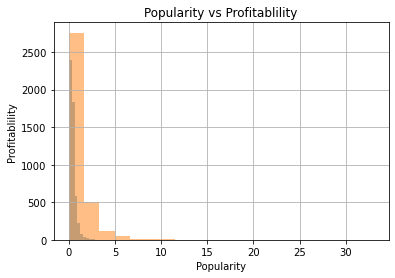

In [30]:
#Use create_hist function to generate hist graph to compare the ditribution of popularity 
#for profitable and unprofitable movies
create_hist(df_profit.popularity,t="Popularity vs Profitablility",x="Popularity",y="Profitablility")

The distribution pattern of popularity looks very like for profitable and unprofitable movies. So popularity is not a contributing factor to profitability

### Does release year associate with the profitability? 

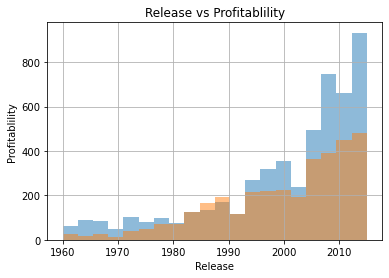

In [31]:
#Use create_hist function to generate hist graph to compare the ditribution of release year
#for profitable and unprofitable movies
create_hist(df_profit.release_year,t="Release vs Profitablility",x="Release",y="Profitablility")

Generally speaking, the unprofitable movies outnumber profitable ones. From 1980 to 1990, they were nearly even.

### Does directors associate with the profitability? 

In [32]:
# The first step is to sum up profitable movies for each director
# I used query and groupby to perform calculation and employ nlargest to filtering top 10 profitable directors
df_director = df_profit.query('profitable == True').groupby('director').sum().nlargest(10, 'profitable').reset_index()
df_director

,director,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitable
0,Steven Spielberg,53,3544,36222,179,51881,1971262162,15107034945,26
1,Clint Eastwood,22,2708,10946,142,41892,700102368,3349328332,21
2,Ridley Scott,42,2257,24310,113,34036,1459825440,4077484533,17
3,Ron Howard,23,2022,9442,105,31922,1131418321,4375721537,16
4,Tim Burton,33,1638,16823,98,30003,1302210201,4520624373,15
5,Woody Allen,11,1452,5204,101,29927,162510222,1156866820,15
6,Martin Scorsese,25,1937,16254,103,27873,668899431,2072292143,14
7,Robert Zemeckis,32,1672,20953,95,27954,1193023872,5458784968,14
8,Joel Schumacher,13,1509,4655,80,25948,712635959,2003766509,13
9,Tony Scott,14,1492,6533,83,25950,887895461,3086401933,13


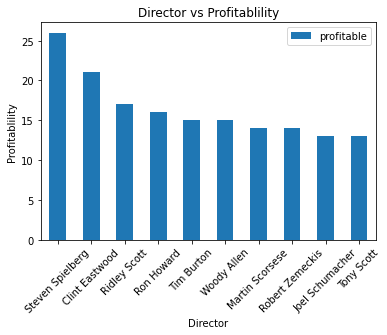

In [33]:
# To display top 10 profitable directors, it is very important to see their name and amount of profitable moviews
# I decided to use vertical bar graph to visualize analyzed dataset
# Create function to generate bar graph to reduce code
def create_bar(db,t,col_a,col_b, xl, yl):
    db[[col_a,col_b]].plot(x=col_a, y=col_b, rot=45, kind='bar',title=t,xlabel=xl,ylabel=yl)
# Visualize datasets for Director vs Profitablility
create_bar(df_director,t="Director vs Profitablility",col_a='director',col_b='profitable',xl="Director",yl="Profitablility")

Just as expected, they are most well known and greatest film directors.It is quite obvious that big famous directors more easily created profitable movies.

### Does genres associate with the profitability? 

In [34]:
# Firstly, I copied exiting dataframe
df_gen=df_genres.copy()
# Calculate profitability and add a new column 'profitable' to the dataframe
df_gen['profitable'] = np.where((df_gen['revenue_adj']-df_gen['budget_adj'])/df_gen['budget_adj'] > 0.11, True, False)
df_gen.head(5)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitable
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,Action,Carlyle Productions,14,6,1960,0,0,False
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,Drama,Carlyle Productions,14,6,1960,0,0,False
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,History,Carlyle Productions,14,6,1960,0,0,False
0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,israel|jewry|middle east conflict|epic,208,War,Carlyle Productions,14,6,1960,0,0,False
1,3,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama,Shamley Productions,1180,8,1960,5949601,235934959,True


In [35]:
# To find the genres that has most profitable movies, I filtered profitable movie only
# Then used groupby and nlargest to genreate the top 10 profitable genres list
df_gen_10 = df_gen.query('profitable == True').groupby('genres').sum().nlargest(10, 'profitable').reset_index()
df_gen_10

,genres,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitable
0,Drama,1590,177567,678945,9964,3067311,41179753921,179328236392,1534
1,Comedy,1327,131965,517861,7918,2602285,39258001502,170852321854,1301
2,Thriller,1330,106702,603654,5988,1939531,38420551278,149880542793,970
3,Action,1514,101984,806527,5559,1805063,54378925122,206705195473,903
4,Adventure,1272,70945,669504,3920,1255283,47669954071,198841732979,628
5,Romance,593,68538,219331,3899,1247828,16138267048,78175328933,624
6,Crime,643,61229,312359,3508,1095168,18908329892,71873892781,548
7,Science Fiction,875,45954,464461,2578,841636,26079442057,101571340566,421
8,Horror,354,40023,137586,2337,807389,7840530617,37172117405,404
9,Family,588,38712,274829,2430,786240,23751363723,102881713909,393


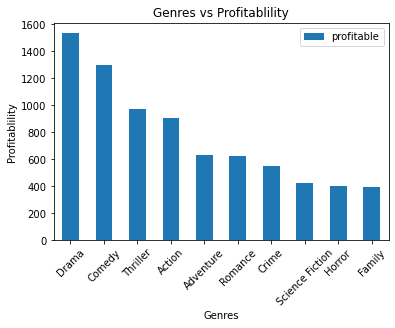

In [36]:
# I still chose the vertical bar graph to see genres name and the amounts of profitable movies
# Leverage the exiting create_bar function to generate analysis
create_bar(df_gen_10,t="Genres vs Profitablility",col_a='genres',col_b='profitable',xl="Genres",yl="Profitablility")

The pattern is very straightforward that Drama, Comedy, Thriller and Action have the most profitable movies. This is also consistent with the previous exploration between popularity and genres.

<a id='conclusions'></a>
## Conclusions

### Question 1 Which genres are most popular from year to year?
From 1960-2015, Drama is the most popular genre, appearing 38 times. Comedy took the second spot, counting 8 times. Action was 5, Triller received 3 times. The Adventure got 2. d

### Question 2 What kinds of properties are associated with profitable movies?
- Vote&budget: low-rating movies are more likely to lose money. High-rating are not associated with profitability
- Popularity: popularity is not a contributing factor to profitability
- Release year: generally speaking, the unprofitable movies outnumber profitable ones   
- Director: big famous directors more easily created profitable movies
- Genres: Drama, Comedy, Thriller and Action have the most profitable movies. This is also consistent with the previous exploration between popularity and genres

### Limitation
- Column'production_companies' has 1030 null value, which makes it impossible to genereate effective analysis based upon this variable and answer question e.g."What production companies produced most profitable movies?"
- Column'keywords' column has 1493 missing data, wich leads to not able to conduct meaningful analysis with it. It is hard to answer questions e.g."What is correlation between keywords and profitabitlity?"
- Column 'release_data' originally used the mm-dd-yy format instead of mm-dd-yyyy, it caused conversion issue that 11/15/66 was taken as 11-15-2066. Therefore, it hindered me to explore the correlation between seasons and profitability. 
- To better investigate what truely contributes to profitability, instead of rating and popularity, we still need more variables around users, e.g., population, gender, geolocation, age etc. So that we can draw conclusion like this "Animation is becoming increasingly popular and profitable around the world, all ages people have interest and willing to watch it"